In [6]:
import math
import numpy as np
import cv2, os
import pandas as pd
from numpy import linalg as LA
from PIL import Image
import matplotlib.pyplot as plt

S = []
Y = []

for name in os.listdir("C:/Users/user/Desktop/PCA/PCA_Basic/faces"):
    nameList = os.listdir("C:/Users/user/Desktop/PCA/PCA_Basic/faces/%s"%name)

    if len(nameList) <50 : 
        continue

    y = name.replace(".jpg","")

    count = 0
    for i in nameList:
        if count == 50 :
            break
        filePath = "C:/Users/user/Desktop/PCA/PCA_Basic/faces/%s/%s"%(name,i)

        # decoding path written by korean
        stream = open( filePath.encode("utf-8") , "rb")
        bytes = bytearray(stream.read())
        numpyArray = np.asarray(bytes, dtype=np.uint8)
        img = cv2.imdecode(numpyArray , cv2.IMREAD_UNCHANGED)

        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        imgArr = np.array(gray)
        temp = np.reshape(imgArr, (150*150))
        Y.append(y)
        S.append(temp)
        count += 1
        y_true.append(name)

S = np.array(S).T

SS = np.zeros_like(S)
for i in range(S.shape[1]):
    SS[:,i] = cv2.equalizeHist(S[:,i]).reshape(-1,)
    
m = np.mean(SS, axis=1)
m = m.reshape(-1, 1) 
D = SS-m

L = D.T @ D
w, v = LA.eig(L) 

zero_eigen = [i for i in range(len(w)) if abs(w[i]) <1e-4]
j=0
for i in zero_eigen:
    w = np.delete(w, i-j, axis=0)
    v = np.delete(v, i-j, axis=1)
    j += 1
    
index = np.argsort(w.real)[::-1] 
ww = w.real[index]
vv = v.real[:,index]  

eigenface_num= 20 # 주축의 개수 
ww = ww[:eigenface_num]
vv = vv[:, :eigenface_num]
u = D @ vv
u = u/(LA.norm(u, axis=0))

weight = u.T @ D  # weight = u @ D.T 
weight.shape

(20, 150)

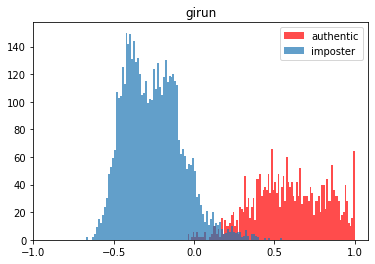

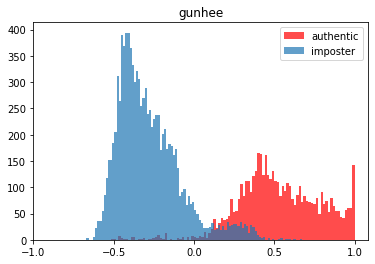

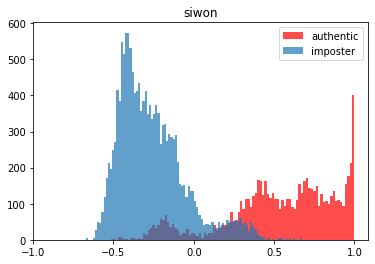

In [144]:
authentic = []
imposter = []
for i in range(50):
    for j in range(len(weight.T)):
        weight.T[i]
        dist1 = LA.norm(weight.T[i])
        dist2 = LA.norm(weight.T[j])
        cosine_similarity = np.dot(weight.T[i], weight.T[j])/(dist1 * dist2)
        if j < 50:
            authentic.append(cosine_similarity)
        else:
            imposter.append(cosine_similarity)
import matplotlib.pyplot as plt
 
plt.hist(authentic, bins=100,alpha=0.7,color='red')
plt.hist(imposter, bins=100,alpha=0.7)
plt.title("girun")
plt.xticks(np.arange(-1,1.1,0.5))
plt.legend(['authentic','imposter'])
plt.show()

authentic1 = []
imposter1 = []
for i in range(50,100):
    for j in range(len(weight.T)):
        weight.T[i]
        dist1 = LA.norm(weight.T[i])
        dist2 = LA.norm(weight.T[j])
        cosine_similarity = np.dot(weight.T[i], weight.T[j])/(dist1 * dist2)
        if j < 100 and j >= 50:
            authentic.append(cosine_similarity)
            authentic1.append(cosine_similarity)
        else:
            imposter.append(cosine_similarity)
            imposter1.append(cosine_similarity)
plt.hist(authentic, bins=100,alpha=0.7,color='red')
plt.hist(imposter, bins=100,alpha=0.7)
plt.title("gunhee")
plt.xticks(np.arange(-1,1.1,0.5))
plt.legend(['authentic','imposter'])
plt.show()

authentic1 = []
imposter1 = []
for i in range(100,150):
    for j in range(len(weight.T)):
        weight.T[i]
        dist1 = LA.norm(weight.T[i])
        dist2 = LA.norm(weight.T[j])
        cosine_similarity = np.dot(weight.T[i], weight.T[j])/(dist1 * dist2)
        if j < 150 and j >= 100:
            authentic.append(cosine_similarity)
            authentic1.append(cosine_similarity)
        else:
            imposter.append(cosine_similarity)      
            imposter1.append(cosine_similarity)
plt.hist(authentic, bins=100,alpha=0.7,color='red')
plt.hist(imposter, bins=100,alpha=0.7)
plt.title("siwon")
plt.xticks(np.arange(-1,1.1,0.5))
plt.legend(['authentic','imposter'])
plt.show()


In [121]:
frr=[]
far=[]

for i in np.arange(-1,1.01,0.05):
    a = np.zeros_like(authentic)
    b = np.zeros_like(imposter)
    cnt=0
    for j in range(len(authentic)):
        if authentic[j] > i:
            a[j]=1
        else:
            cnt += 1
    frr.append(cnt/(len(authentic)+len(imposter)))        
    cnt = 0
    for z in range(len(imposter)):
        if imposter[z] > i:
            b[j]=1
            cnt += 1
    far.append(cnt/(len(authentic)+len(imposter)))

Text(0, 0.5, 'FAR')

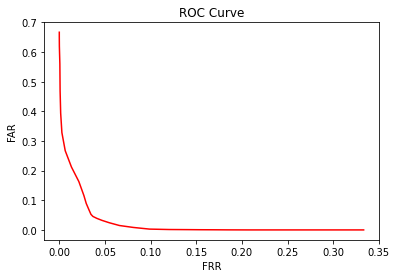

In [141]:
plt.plot(frr,far,color='red')
plt.title('ROC Curve')
plt.xlabel('FRR')
plt.ylabel('FAR')

### ERR 구하기

In [132]:
#ERR의 해당 Threshold 값 계산
x = 1
for i in range(len(far)):
    if abs(frr[i] - far[i]) < x:
        x = abs(frr[i] - far[i])
        j = i
print(-1  + 0.05*j)

0.15000000000000013


In [134]:
#ERR 계산
far[23] + frr[23]

0.08008888888888889